SENTIMENTAL ANALYSIS PROJECT WITH NAIVE BAYES

In [ ]:
#For installing pips

In [11]:
#Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import re
import string

In [2]:
#importing the dataset
df = pd.read_csv('../Dataset/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


DATA ANALYSIS

In [5]:
#Sentiment Count
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

<AxesSubplot: >

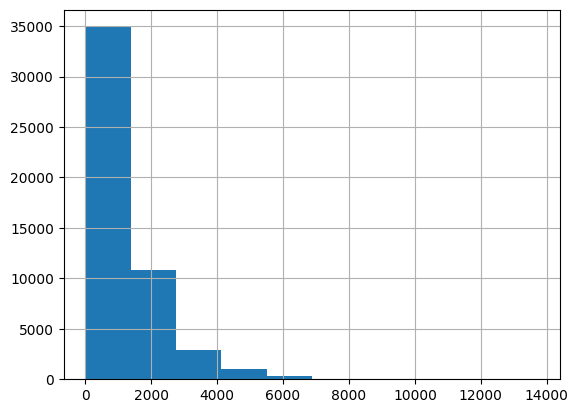

In [6]:
df['review'].str.len().hist()

Text(0.5, 1.0, 'Negative Reviews')

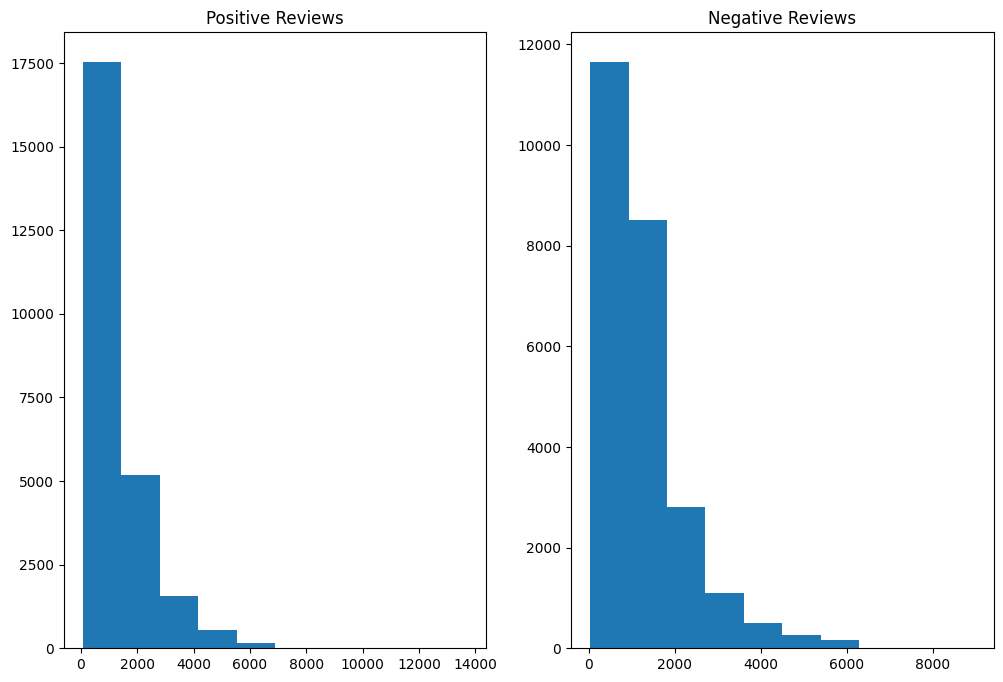

In [7]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
ax1.hist(df[df['sentiment']=='positive']['review'].str.len())
ax1.set_title( 'Positive Reviews')
ax2.hist(df[df['sentiment']=='negative']['review'].str.len())
ax2.set_title( 'Negative Reviews')

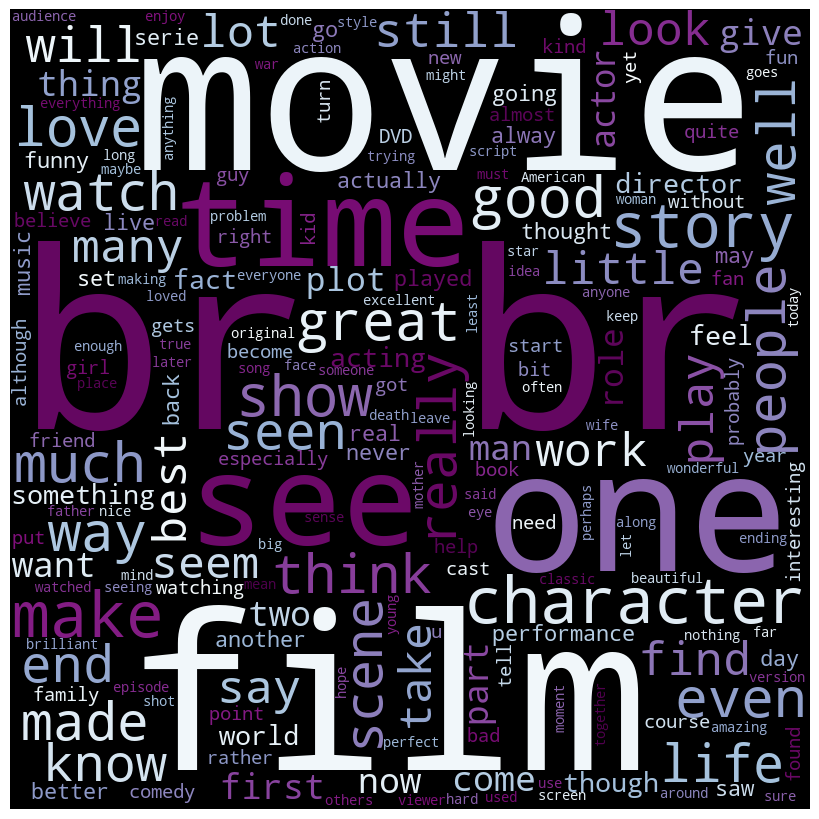

In [15]:
#WordCLoud of most freq POSITIVE Review Words

text = " ".join(i for i in df[df['sentiment']=='positive']['review'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black',  min_font_size = 10, colormap='BuPu', contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

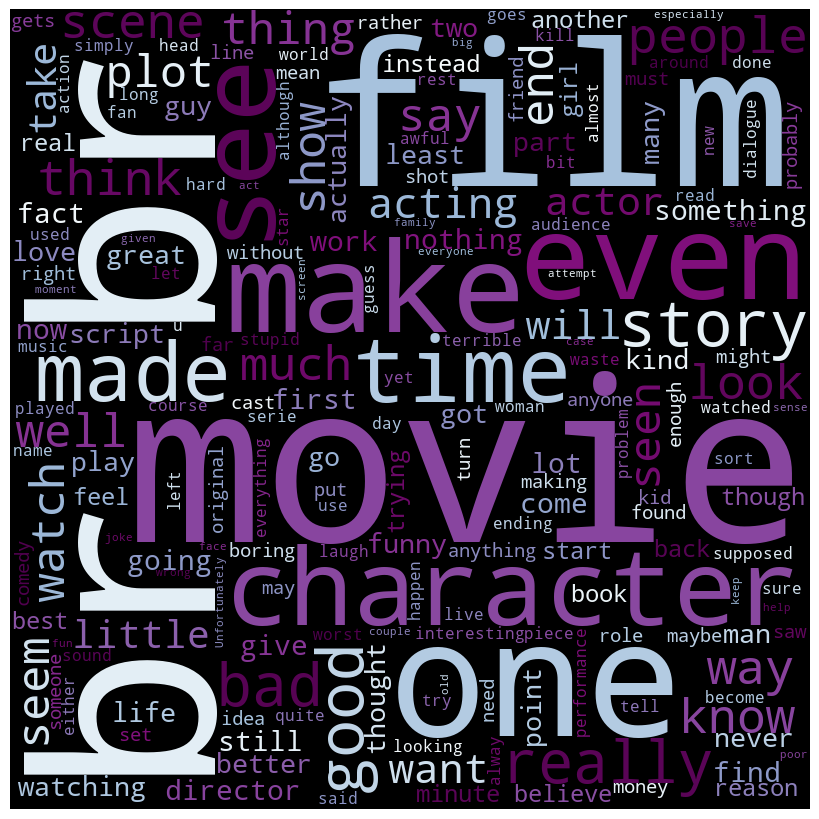

In [16]:
#WordCLoud of most freq Negative Review Words

text = " ".join(i for i in df[df['sentiment']=='negative']['review'])

wordcloud = WordCloud(width = 800, height = 800, background_color ='black',  min_font_size = 10, colormap='BuPu', contour_width=3, contour_color='steelblue').generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()